# EFFECTS OF BIKE RIDE CHARACTERISTICS ON DURATION AND DISTANCE

## by GABRIEL CÁRDENAS

## Investigation Overview

In this investigation I wanted to look at the characteristics of bike rides that could be used to predict their how long is the average of bike rides, when are most rides taken in terms of the day of the week and hour of the day, and if the cutomer type is relevant about this.


## Dataset Overview
The dataset to be analyzed is based on the ride data of the company Bay Wheels for public use. The dataset before being polished contains the data of 154,967 anonymous trips with 13 features that are:
- Duration of the ride (seconds)
- Start time and date (and)  - Finish time and date
- Identification of the starting station (and) - End station identification
- Departure station name (and) - End station name
- Departure station latitude (and) - Length of departure station
- Final station latitude (and) End station length
- Bike ID 
- Type of user (subscriber or consumer - "Subscriber" = Member or "Consumer" = Casual)

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
ride_bike = pd.read_csv('202007-baywheels-tripdata.csv')

In [8]:
print('The shape of the dataset before cleaning is: ', ride_bike.shape)
ride_bike.head()

The shape of the dataset before cleaning is:  (154967, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,68213B7BB2420043,electric_bike,2020-07-31 17:36:17,2020-07-31 17:48:13,NaN,NaN,McAllister St at Baker St,52.0,37.790000,-122.460000,37.777414,-122.441949,casual
1,A64F0CD3A8E59529,electric_bike,2020-07-31 19:42:50,2020-07-31 19:49:54,Buchanan St at North Point St,400.0,Buchanan St at North Point St,400.0,37.804388,-122.433510,37.804408,-122.433509,casual
2,B3690CA0F5179242,electric_bike,2020-07-31 17:18:46,2020-07-31 17:36:31,NaN,NaN,Hyde St at Post St,369.0,37.760000,-122.410000,37.787422,-122.416777,casual
3,162FFE2E157F4C8F,electric_bike,2020-07-31 20:48:47,2020-07-31 21:05:04,Jersey St at Castro St,137.0,NaN,NaN,37.750576,-122.433743,37.770000,-122.420000,casual
4,C5DA8100F428B934,electric_bike,2020-07-31 20:18:24,2020-07-31 20:24:26,Market St at Steuart St,16.0,NaN,NaN,37.794582,-122.394791,37.790000,-122.400000,casual


In [9]:
# We drop columns: 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'
ride_bike.drop(['ride_id', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'], axis=1, inplace=True)

# We drop rows with missing values
ride_bike.dropna(inplace=True)

# We convert de object datatype of 'started_at' and 'ended_at' to Datetime.
ride_bike['started_at'] = pd.to_datetime(ride_bike['started_at'])
ride_bike['ended_at'] = pd.to_datetime(ride_bike['ended_at'])

# We create separate columns for day of the week, day, month, year and also we add and calculate another called 'duration'.
ride_bike['day_of_the_week'] = ride_bike['started_at'].dt.weekday.astype(str)
ride_bike['duration_min'] = ride_bike['ended_at'] - ride_bike['started_at']
ride_bike['duration_min'] = ride_bike['duration_min'].dt.seconds / 60

# We set the days of the weeks with their names instead of number.
ride_bike['day_of_the_week'] = ride_bike['day_of_the_week'].replace({'0': 'Monday'}, regex=True)
ride_bike['day_of_the_week'] = ride_bike['day_of_the_week'].replace({'1': 'Twuesday'}, regex=True)
ride_bike['day_of_the_week'] = ride_bike['day_of_the_week'].replace({'2': 'Wednesday'}, regex=True)
ride_bike['day_of_the_week'] = ride_bike['day_of_the_week'].replace({'3': 'Thursday'}, regex=True)
ride_bike['day_of_the_week'] = ride_bike['day_of_the_week'].replace({'4': 'Friday'}, regex=True)
ride_bike['day_of_the_week'] = ride_bike['day_of_the_week'].replace({'5': 'Saturday'}, regex=True)
ride_bike['day_of_the_week'] = ride_bike['day_of_the_week'].replace({'6': 'Sunday'}, regex=True)

# We define haversine function
def haversine (lat1, lon1, lat2, lon2):
    rad = math.pi/180
    diff_lat = lat2 - lat1
    diff_lon = lon2 - lon1
    R = 6372.795477598
    a = (math.sin(rad*diff_lat/2))**2 + math.cos(rad*lat1) * math.cos(rad*lat2) * (math.sin(rad*diff_lon/2))**2
    distancia = 2*R*math.asin(math.sqrt(a))
    return distancia

# Now we are going to create a new column called 'total_dist' where we calculate the distance traveled.
distance_km = []
mesure = ride_bike.shape[0]
for x in range(mesure):
    lat1 = ride_bike.iloc[x, 3]
    lon1  = ride_bike.iloc[x, 4]
    lat2 = ride_bike.iloc[x, 5]
    lon2 = ride_bike.iloc[x, 6]
    distance = haversine(lat1, lon1 , lat2, lon2)
    distance_km.append(distance)
ride_bike['distance_km'] = distance_km

# Drop the columns 'start_lat', 'start_lng', 'end_lat', 'end_lng', we don't need its.
ride_bike = ride_bike.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1)

After cleaning the dataset, this consists of 154771 duration ofrides bikes and their features. The features included the bike type, start date and time, customer type, day_of_the_week, day, duration_min, distance_km). One hundred ninety-six data points were removed from the analysis due to inconsistencies or missing information.

In [10]:
print('The shape of the dataset after cleaning is: ', ride_bike.shape)

The shape of the dataset after cleaning is:  (154771, 7)


The average duration of bike rides is 20,26 minutes and the average distance traveled is 2,42 kilometers.

In [11]:
print('The average duration of bike rides is ', ride_bike['duration_min'].mean(), 'minutes')
print('The average distance of bike rides is ', ride_bike['distance_km'].mean(), 'kilometers')

The average duration of bike rides is  20.25911163374665 minutes
The average distance of bike rides is  2.414868529278486 kilometers


## Distribution of duration of the bike rides.

Rides duration in the dataset take on a very large range of values, from 0 minutes at the lowest, to about 1439 at the highest. Plotted on a logarithmic scale, the distribution of duration column takes on a unimodal shape.

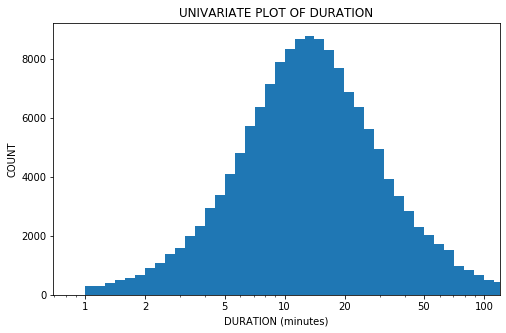

In [43]:
# Plot hist of 'duration_min' with xscale('log') and pyplot xlim function between 0 and 120
binsize = 0.05
bins = 10 ** np.arange(0, np.log10(ride_bike['duration_min'].max())+binsize, binsize)

# We plot histogram with pyplot log function 
plt.figure(figsize=[8, 5])
plt.hist(data = ride_bike, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xlim(0, 120)
plt.xlabel('DURATION (minutes)')
plt.ylabel('COUNT')
plt.title('UNIVARIATE PLOT OF DURATION')
ticks_locs = [1, 2, 5, 10, 20, 50, 100]
plt.xticks(ticks_locs, ticks_locs)
plt.show()

We observe that there are a big peak of quantity of bike rides with a duration about 12 minutes more or less, and the majority of the bike rides are between 3 minutes and 60 minutes aproximately.

## Distribution of the distance traveled of bike rides.

Distance trraveled is a measure of each bike ride. A large proportion of values of distance, from 0 at the lowest, to about 6802 at the highest. Plotted on a logarithmic scale, the distribution of distance column takes on a bimodal shape with a high peak at the beginning.

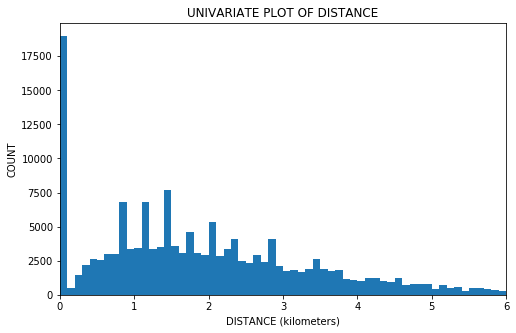

In [44]:
# Xlim-scaled plot of 'distance_km' because there is a long tail in the distributiin
binsize = 0.1
bins = np.arange(0, ride_bike['distance_km'].max()+binsize, binsize)

# We plot histogram with pyplot xlim function cause we have much outlier above 10 more or less
plt.figure(figsize=[8, 5])
plt.hist(data = ride_bike, x = 'distance_km', bins = bins);
plt.xlim(0, 6)
plt.xlabel('DISTANCE (kilometers)')
plt.ylabel('COUNT');
plt.title('UNIVARIATE PLOT OF DISTANCE');
plt.show();

Most of the bikes rides respectively the total of the data have a greater duration of 6 km and the majority of the ride bikes have a very short distance traveled, between 100 and 200 meters. 

## Distribution of the customer type, hour of the day and day of the week.

Three features are categorical, so we see the differences in proportions between them, noting that the majority customer type is of a case type of 92867 records compared to the subscriber with 61904. We also noted that the rush day of the service is on Saturday and a little lower portion on Sunday. We also noted that the rush hour normally is at 5pn.

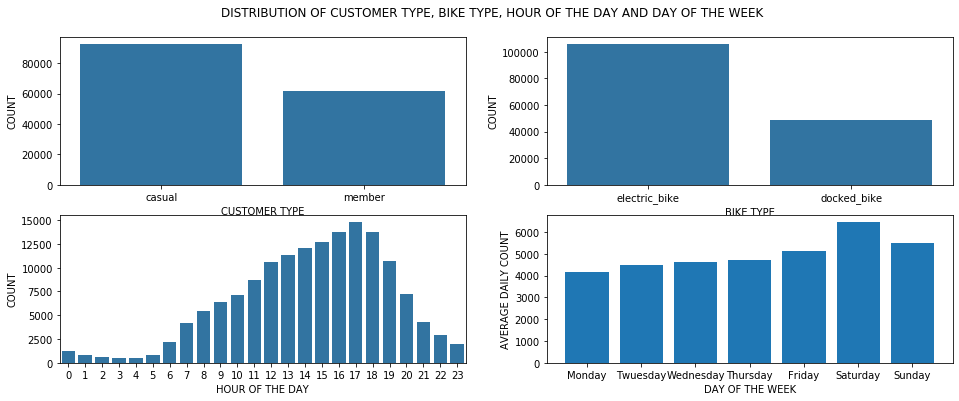

In [12]:
# let's plot all five together to get an idea of each ordinal variable's distribution.
plt.figure(figsize = [16, 6])

# Plot
base_color = sb.color_palette()[0]

plt.suptitle('DISTRIBUTION OF CUSTOMER TYPE, BIKE TYPE, HOUR OF THE DAY AND DAY OF THE WEEK', x=0.5, y=0.95, ha='center')

plt.subplot(2,2,1)
sb.countplot(data = ride_bike, x = 'member_casual', color = base_color);
plt.xlabel('CUSTOMER TYPE')
plt.ylabel('COUNT')

plt.subplot(2,2,2)
sb.countplot(data = ride_bike, x = 'rideable_type', color = base_color);
plt.xlabel('BIKE TYPE')
plt.ylabel('COUNT')

plt.subplot(2,2,3)
sb.countplot(ride_bike['started_at'].dt.hour, color = base_color);
plt.xlabel('HOUR OF THE DAY')
plt.ylabel('COUNT')

# We calculate the last plot with proportions for day of day_of_the_week because in July of 2020 we have 4 days for Monday, 
# Twuesday, Saturday and Sunday, and 5 days for Wednesday, Thursday and Friday
plt.subplot(2,2,4)
week_order = ['Monday', 'Twuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Monday = ride_bike[ride_bike['day_of_the_week'] == 'Monday']['day_of_the_week'].count() / 4
Twesday = ride_bike[ride_bike['day_of_the_week'] == 'Twuesday']['day_of_the_week'].count() / 4
Wednesday = ride_bike[ride_bike['day_of_the_week'] == 'Wednesday']['day_of_the_week'].count() / 5
Thursday = ride_bike[ride_bike['day_of_the_week'] == 'Thursday']['day_of_the_week'].count() / 5
Friday = ride_bike[ride_bike['day_of_the_week'] == 'Friday']['day_of_the_week'].count() / 5
Saturday = ride_bike[ride_bike['day_of_the_week'] == 'Saturday']['day_of_the_week'].count() / 4
Sunday = ride_bike[ride_bike['day_of_the_week'] == 'Sunday']['day_of_the_week'].count() / 4
heights = [Monday, Twesday, Wednesday, Thursday, Friday, Saturday, Sunday]
plt.bar(week_order, heights);
plt.xlabel('DAY OF THE WEEK')
plt.ylabel('AVERAGE DAILY COUNT')

plt.show()

- **`CUSTOMER TYPE`:** We observe that the majority of clients are casual with 50% more than subscribed clients
We observe that more or less twice as many electric bikes were used compared to docked bikes.
- **`BIKE TYPE`:** We observe that more or less twice as many electric bikes were used compared to docked bikes.
- **`HOUR OF THE DAY`:** We observe that the rush hour is at 5 pm and the majority of ride bikes is between the 7 am and 9 pm.
- **`DAY OF THE WEEK`:** We bserve that the majority of ride bikes are in Saturday and in second place in Sunday, followin of Friday. During the week there are fewer amounts of bike rides and follows a slightly ascending line from Monday to Friday

## Duration vs. Distance

Plotting duration on a scale and taking an approximately linear relationship we note that as in start for short durations the longer duration proportionally the more distance is traveled with high increment, but from about 30 minutes it descends in the same way.

We also note that the peak of the relationship indicates that the average of duration for the maximum distance travelled is about 30 minutes with an distance about 9 kilometers.

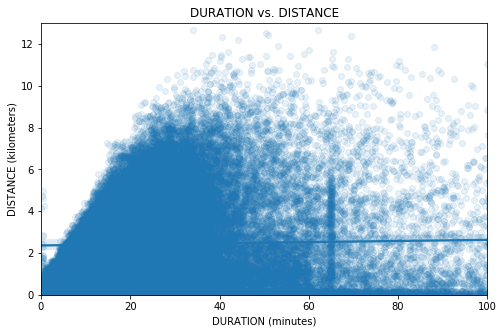

In [46]:
# Scatterplot with Seaborn Regplot for duration_min and distance_km
plt.figure(figsize = [8, 5])

sb.regplot(data = ride_bike, x = 'duration_min', y = 'distance_km', x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/10});
plt.xlim(0, 100);
plt.ylim(0, 13);
plt.xlabel('DURATION (minutes)')
plt.ylabel('DISTANCE (kilometers)')
plt.title('DURATION vs. DISTANCE');

We observe that most of the bike rides are between 0 and 60 minutes and there are an ascending correlation line of distance traveled until reaching the duration of 30 minutes and then comes down, so there are a peak in durations of 30 minutes with a distance travaled of about 9 km more or less.

## Duration vs. Distance by Customer Type

We note the interaction effect visible between duration, distance and customer type, where as I could see before the ratio of duration to the distance traveled increases to a maximum peak to 30 minutes of about 10 kilometers traveled and then descends in the same proportion, and it is also noted that this relationship is maintained regardless of the type of customer that is using the service.

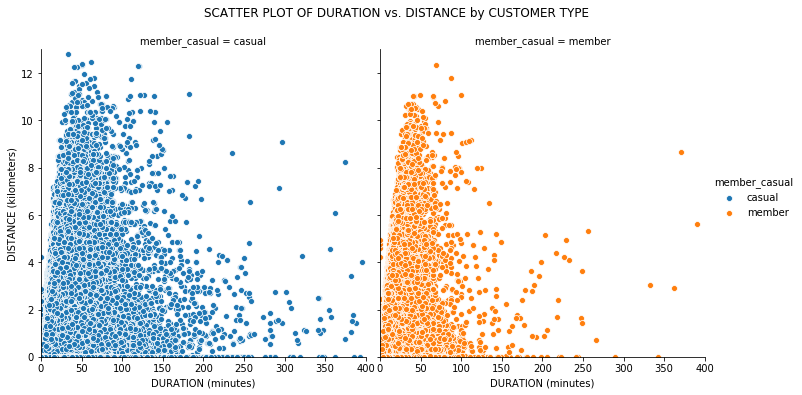

In [47]:
g = sb.FacetGrid(ride_bike, col="member_casual", hue='member_casual', size=5);
g.map_dataframe(sb.scatterplot, x="duration_min", y="distance_km");
plt.xlim(0, 400);
plt.ylim(0, 13);
g.fig.suptitle('SCATTER PLOT OF DURATION vs. DISTANCE by CUSTOMER TYPE', y=1.05);
g.add_legend()
g.set_axis_labels("DURATION (minutes)", "DISTANCE (kilometers)");

We observe that the type of client hardly interferes in the relationship between the duration of the bicycle ride and the distance traveled following more or less the same pattern, but would tell although with a greater number of rides for casual clients because they are the ones who use the service the most

## Duration and Customer Type by Bike Type

Plotting duration and customer type by bike type we notice there is not a substantial relationship between duration of the ride and if the customer is a member or casual. We also see that this relationship doesn't exist either for the bike type.

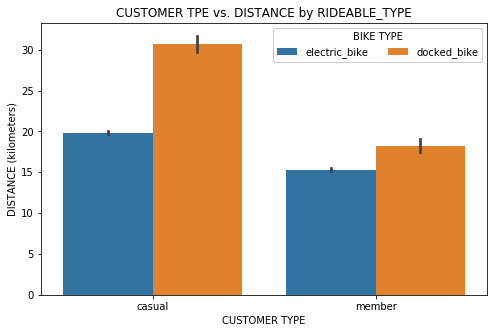

In [48]:
plt.figure(figsize = [8, 5])
ax = sb.barplot(data = ride_bike, x = 'member_casual', y = 'duration_min', hue = 'rideable_type');
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'BIKE TYPE');
plt.xlabel('CUSTOMER TYPE')
plt.ylabel('DISTANCE (kilometers)');
plt.title('CUSTOMER TPE vs. DISTANCE by RIDEABLE_TYPE');

We onserve that not exists correlatin between customer type or bike type with duration of bike rides, but we would tell that is obvius tht there are more casual customers than suscribers and more electrical bikes than docked bikes.

## Distance and Customer Type by Bike Type

Plotting distance and customer type by bike type we notice there is not a substantial relationship between distance traveled and if the customer is a member or casual. We also see that this relationship doesn't exist either for the bike type.

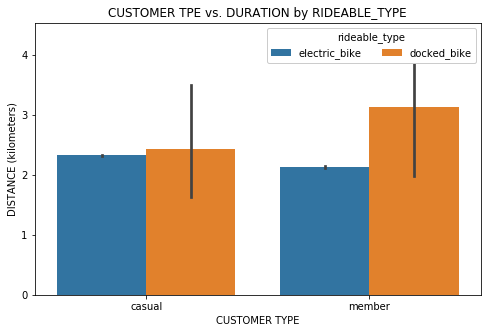

In [49]:
plt.figure(figsize = [8, 5])
ax = sb.barplot(data = ride_bike, x = 'member_casual', y = 'distance_km', hue = 'rideable_type');
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'rideable_type');
plt.xlabel('CUSTOMER TYPE')
plt.ylabel('DISTANCE (kilometers)');
plt.title('CUSTOMER TPE vs. DURATION by RIDEABLE_TYPE');

We onserve that not exists correlatin between customer type or bike type with distance of bike rides, but we would tell that is obvius tht there are more casual customers than suscribers and more electrical bikes than docked bikes.